## Reading, Manipulation and Plotting the Data

In [22]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from datetime import datetime, timedelta

In [2]:
## Read CSV file
url = 'https://raw.githubusercontent.com/mhenson1989/group_one_project/NYu/Resources/TX%20House%20Values%20over%20time%20zip.csv'
df = pd.read_csv(url, dtype={'RegionName': 'str'})
df

,RegionName,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,...,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022
0,77449,107022.0,107035.0,106837.0,106842.0,106873.0,107086.0,107241.0,107470.0,107852.0,...,248825.0,252759.0,256703.0,261364.0,267052.0,273342.0,279445.0,284486.0,287887.0,289807
1,77494,223494.0,223809.0,224529.0,225749.0,225314.0,224980.0,223865.0,224204.0,223807.0,...,433752.0,439463.0,445527.0,455014.0,466640.0,480345.0,491744.0,499245.0,501521.0,499656
2,79936,90944.0,90944.0,90977.0,90942.0,90960.0,90918.0,90903.0,90856.0,90322.0,...,173549.0,175165.0,177176.0,179147.0,181316.0,184703.0,188330.0,191792.0,194033.0,195742
3,77084,106747.0,106688.0,106428.0,106372.0,106332.0,106497.0,106535.0,106723.0,107122.0,...,246635.0,250127.0,253559.0,257727.0,262999.0,268809.0,274339.0,278739.0,281664.0,283336
4,78660,162610.0,163068.0,163266.0,163792.0,164150.0,164520.0,164415.0,164594.0,164728.0,...,448700.0,460521.0,470857.0,483347.0,494840.0,504678.0,511659.0,507412.0,497438.0,485037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,77415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,184037.0,187869.0,193088.0,198942.0,203369.0,206027.0,208188.0,212099.0,217161.0,220588
1618,76370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,71372.0,72247.0,72536.0,73890.0,73881.0,74918.0,73925.0,74863.0,75165.0,74710
1619,77453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,116128.0,117958.0,119739.0,121700.0,122599.0,122400.0,122065.0,123121.0,124696.0,126368
1620,75682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,136859.0,140101.0,141740.0,144250.0,144159.0,145752.0,146315.0,148680.0,150852.0,153219


In [3]:
# Set RegionName as index 
df1 = df.set_index('RegionName')

# Transpose and set index label to Date
df1 = df1.transpose().rename_axis(None, axis=1).rename_axis("Date", axis=0)
df1

,77449,77494,79936,77084,78660,78521,75052,77433,77479,77573,...,77475,78561,79788,77470,77661,77415,76370,77453,75682,77448
Date,,,,,,,,,,,,,,,,,,,,,
1/31/2000,107022.0,223494.0,90944.0,106747.0,162610.0,NaN,113765.0,180061.0,239250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/2000,107035.0,223809.0,90944.0,106688.0,163068.0,NaN,113923.0,180178.0,240215.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/31/2000,106837.0,224529.0,90977.0,106428.0,163266.0,NaN,114036.0,179868.0,241183.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4/30/2000,106842.0,225749.0,90942.0,106372.0,163792.0,NaN,114274.0,179985.0,243151.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5/31/2000,106873.0,225314.0,90960.0,106332.0,164150.0,NaN,114520.0,179852.0,243879.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/30/2022,273342.0,480345.0,184703.0,268809.0,504678.0,140642.0,335975.0,402719.0,514357.0,373249.0,...,156510.0,79430.0,79790.0,110500.0,181396.0,206027.0,74918.0,122400.0,145752.0,141676.0
5/31/2022,279445.0,491744.0,188330.0,274339.0,511659.0,142419.0,344230.0,412084.0,525179.0,378872.0,...,155553.0,80133.0,80605.0,111576.0,180077.0,208188.0,73925.0,122065.0,146315.0,141614.0
6/30/2022,284486.0,499245.0,191792.0,278739.0,507412.0,144940.0,351195.0,419941.0,531660.0,382132.0,...,157011.0,82048.0,82167.0,113967.0,179105.0,212099.0,74863.0,123121.0,148680.0,142819.0


In [4]:
# Reset index to check data types 
df1 = df1.reset_index()
df1

,Date,77449,77494,79936,77084,78660,78521,75052,77433,77479,...,77475,78561,79788,77470,77661,77415,76370,77453,75682,77448
0,1/31/2000,107022.0,223494.0,90944.0,106747.0,162610.0,NaN,113765.0,180061.0,239250.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2/29/2000,107035.0,223809.0,90944.0,106688.0,163068.0,NaN,113923.0,180178.0,240215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/31/2000,106837.0,224529.0,90977.0,106428.0,163266.0,NaN,114036.0,179868.0,241183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/30/2000,106842.0,225749.0,90942.0,106372.0,163792.0,NaN,114274.0,179985.0,243151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5/31/2000,106873.0,225314.0,90960.0,106332.0,164150.0,NaN,114520.0,179852.0,243879.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,4/30/2022,273342.0,480345.0,184703.0,268809.0,504678.0,140642.0,335975.0,402719.0,514357.0,...,156510.0,79430.0,79790.0,110500.0,181396.0,206027.0,74918.0,122400.0,145752.0,141676.0
268,5/31/2022,279445.0,491744.0,188330.0,274339.0,511659.0,142419.0,344230.0,412084.0,525179.0,...,155553.0,80133.0,80605.0,111576.0,180077.0,208188.0,73925.0,122065.0,146315.0,141614.0
269,6/30/2022,284486.0,499245.0,191792.0,278739.0,507412.0,144940.0,351195.0,419941.0,531660.0,...,157011.0,82048.0,82167.0,113967.0,179105.0,212099.0,74863.0,123121.0,148680.0,142819.0
270,7/31/2022,287887.0,501521.0,194033.0,281664.0,497438.0,147410.0,353836.0,425380.0,533104.0,...,158862.0,83491.0,82629.0,116572.0,178993.0,217161.0,75165.0,124696.0,150852.0,143414.0


In [5]:
# Checking data types
df1.dtypes

Date      object
77449    float64
77494    float64
79936    float64
77084    float64
          ...   
77415    float64
76370    float64
77453    float64
75682    float64
77448    float64
Length: 1623, dtype: object

In [6]:
# Converting Date column dtype from object to datetime values
df1['Date'] = pd.to_datetime(df1['Date'])

In [7]:
# # Set Date column as Index 
df1 = df1.set_index('Date')
df1

,77449,77494,79936,77084,78660,78521,75052,77433,77479,77573,...,77475,78561,79788,77470,77661,77415,76370,77453,75682,77448
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,107022.0,223494.0,90944.0,106747.0,162610.0,NaN,113765.0,180061.0,239250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,107035.0,223809.0,90944.0,106688.0,163068.0,NaN,113923.0,180178.0,240215.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,106837.0,224529.0,90977.0,106428.0,163266.0,NaN,114036.0,179868.0,241183.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,106842.0,225749.0,90942.0,106372.0,163792.0,NaN,114274.0,179985.0,243151.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,106873.0,225314.0,90960.0,106332.0,164150.0,NaN,114520.0,179852.0,243879.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,273342.0,480345.0,184703.0,268809.0,504678.0,140642.0,335975.0,402719.0,514357.0,373249.0,...,156510.0,79430.0,79790.0,110500.0,181396.0,206027.0,74918.0,122400.0,145752.0,141676.0
2022-05-31,279445.0,491744.0,188330.0,274339.0,511659.0,142419.0,344230.0,412084.0,525179.0,378872.0,...,155553.0,80133.0,80605.0,111576.0,180077.0,208188.0,73925.0,122065.0,146315.0,141614.0
2022-06-30,284486.0,499245.0,191792.0,278739.0,507412.0,144940.0,351195.0,419941.0,531660.0,382132.0,...,157011.0,82048.0,82167.0,113967.0,179105.0,212099.0,74863.0,123121.0,148680.0,142819.0


## Plotting Data for each zip code

<Figure size 2400x1200 with 0 Axes>

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


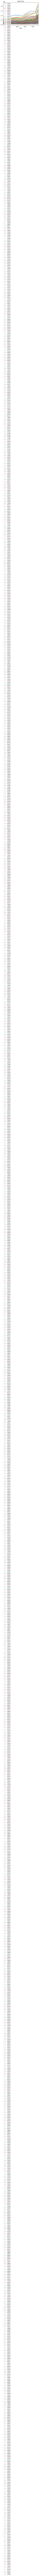

In [8]:
# Visualizing The House Sales Price by zip code
# Set the plot size
plt.figure(figsize=(16, 8), dpi=150)
  
# using .plot method to plot House Sales Price.
df1.plot(label='df1')
  
# adding title
plt.title('Sales Price')
  
# adding label to x-axis
plt.xlabel('Years')
  
# adding legend.
plt.legend()

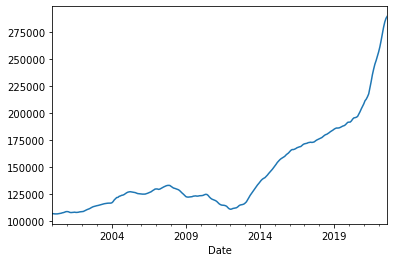

In [9]:
# Visualizing The House Sales Price for only 77449 Zip Code
  
# using .plot method to plot House Sales Price.
df1['77449'].plot()

plt.show()

# Machine Learning - Linear Regression

In [10]:
# Setting and creating new dataframe. Accounting for all available data. Initial thought was to slice dataframe 
# based on recent historical data, however this latest data is been influenced by COVID pandemic and the objective 
# of the project is to predict long term house value 
df2 = df1['2000-1-31' :'2022-8-31']
df2.head()

,77449,77494,79936,77084,78660,78521,75052,77433,77479,77573,...,77475,78561,79788,77470,77661,77415,76370,77453,75682,77448
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,107022.0,223494.0,90944.0,106747.0,162610.0,NaN,113765.0,180061.0,239250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,107035.0,223809.0,90944.0,106688.0,163068.0,NaN,113923.0,180178.0,240215.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,106837.0,224529.0,90977.0,106428.0,163266.0,NaN,114036.0,179868.0,241183.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,106842.0,225749.0,90942.0,106372.0,163792.0,NaN,114274.0,179985.0,243151.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,106873.0,225314.0,90960.0,106332.0,164150.0,NaN,114520.0,179852.0,243879.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

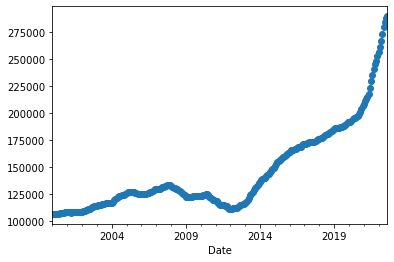

In [11]:
# Visualizing The House Sales Price for only 77449 Zip Code
df2['77449'].plot(marker='o', ls='')

In [12]:
# Reshaping the X (corresponding dates to Sale Price) into an array. All dates are passed through pandas 
#‘to_datetime()’ function to convert it to float numeric for regression purpose. index.values is chained since dates
# is the index of the dataframe
X = np.array(pd.to_datetime(df2['77449']).index.values, dtype=float).reshape(-1, 1)
X

array([[9.4927680e+17],
       [9.5178240e+17],
       [9.5446080e+17],
       [9.5705280e+17],
       [9.5973120e+17],
       [9.6232320e+17],
       [9.6500160e+17],
       [9.6768000e+17],
       [9.7027200e+17],
       [9.7295040e+17],
       [9.7554240e+17],
       [9.7822080e+17],
       [9.8089920e+17],
       [9.8331840e+17],
       [9.8599680e+17],
       [9.8858880e+17],
       [9.9126720e+17],
       [9.9385920e+17],
       [9.9653760e+17],
       [9.9921600e+17],
       [1.0018080e+18],
       [1.0044864e+18],
       [1.0070784e+18],
       [1.0097568e+18],
       [1.0124352e+18],
       [1.0148544e+18],
       [1.0175328e+18],
       [1.0201248e+18],
       [1.0228032e+18],
       [1.0253952e+18],
       [1.0280736e+18],
       [1.0307520e+18],
       [1.0333440e+18],
       [1.0360224e+18],
       [1.0386144e+18],
       [1.0412928e+18],
       [1.0439712e+18],
       [1.0463904e+18],
       [1.0490688e+18],
       [1.0516608e+18],
       [1.0543392e+18],
       [1.056931

In [13]:
# The shape of X is 22 samples, with a single feature (column)
X.shape

(272, 1)

In [15]:
# The y variable is the Sales Price for 77449 zip code
y = np.array(df2['77449'].values)
y

array([107022., 107035., 106837., 106842., 106873., 107086., 107241.,
       107470., 107852., 108087., 108540., 108944., 108998., 108802.,
       108273., 108089., 108149., 108306., 108451., 108223., 108263.,
       108418., 108702., 108813., 108933., 109109., 109685., 110280.,
       110811., 111203., 111695., 112387., 112997., 113525., 113862.,
       114185., 114460., 114680., 115011., 115337., 115751., 116028.,
       116281., 116505., 116649., 116787., 116757., 116829., 117073.,
       118113., 119753., 120905., 121993., 122138., 123111., 123474.,
       124045., 124243., 124770., 125576., 126365., 126940., 127241.,
       127390., 127183., 127078., 126818., 126571., 126148., 125661.,
       125549., 125366., 125393., 125153., 125210., 125191., 125540.,
       125938., 126417., 126911., 127426., 128347., 128998., 129812.,
       129962., 129887., 129534., 129853., 130534., 131322., 131777.,
       132335., 132834., 133179., 133260., 133171., 132422., 131553.,
       130772., 1304

In [16]:
# Create linear regression model with scikit-learn
model = LinearRegression()

In [17]:
# Fit data into the model
model.fit(X, y)

LinearRegression()

In [18]:
# The model creates predicted y values based on X values
y_pred = model.predict(X)
print(y_pred.shape)

(272,)


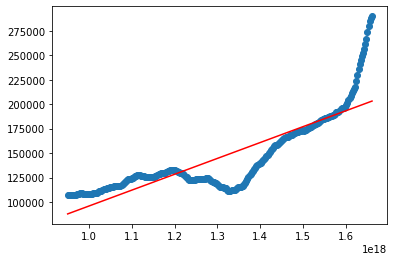

In [19]:
# Plotting the results
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [26]:
# slice dataframe for 3 columns only
df3 = df2[["77449", "77494", "79936"]].copy() 
df3

,77449,77494,79936
Date,,,
2000-01-31,107022.0,223494.0,90944.0
2000-02-29,107035.0,223809.0,90944.0
2000-03-31,106837.0,224529.0,90977.0
2000-04-30,106842.0,225749.0,90942.0
2000-05-31,106873.0,225314.0,90960.0
...,...,...,...
2022-04-30,273342.0,480345.0,184703.0
2022-05-31,279445.0,491744.0,188330.0
2022-06-30,284486.0,499245.0,191792.0


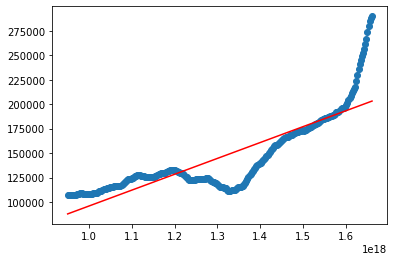

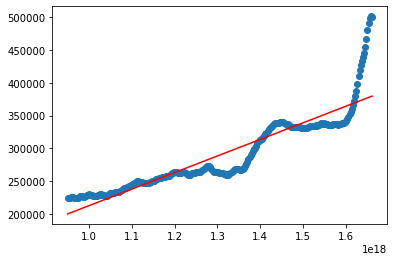

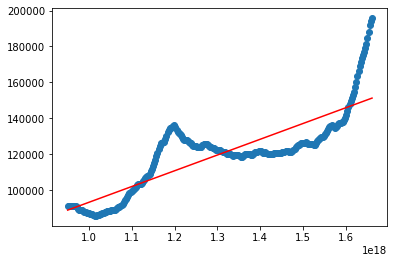

In [30]:
# For loop to go over each column in dataframe
for column in df3:
    #print(df[column])
    y = np.array(df2[column].values)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    #print(y_pred.shape)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.show()


In [ ]:
# Converting X back to datetime for plotting and prediction in HTML

In [29]:
# Converting X back to datetime for plotting and prediction
#X1 = np.linspace(min(X),max(X),50)
#X2 = X.copy() 
#X3 = pd.to_datetime(X2, unit='s')